### Actividad Práctica: Análisis eInterpretación de Datos con Python

### Objetivo

- Aplicar técnicas de análisis exploratorio, estadística descriptiva,
distribuciones de probabilidad, clustering y reducción de dimensionalidad para
extraer información útil de un conjunto de datos real.

### Requisitos Previos

- Uso de Python y librerías: pandas, numpy, matplotlib, seaborn,
scipy.stats, sklearn.
- Familiaridad con manipulación de datos, estadística básica y machine
learning.
- Entorno recomendado: Anaconda y Jupyter Notebooks.

### Conjunto de Datos

### Usaremos el dataset penguins de la librería seaborn, que contiene características de tres especies de pingüinos.


### Columnas principales:

- species: Especie del pingüino.
- bill_length_mm, bill_depth_mm: Longitud y profundidad del pico en mm.
- flipper_length_mm: Longitud de las aletas en mm.
- body_mass_g: Masa corporal en gramos.
- island: Isla de origen.
- sex: Sexo del pingüino.


### Ejercicios


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

### Ejercicio 1: Análisis Exploratorio y Estadísticos Básicos
- Instrucciones:
    - 1. Carga el conjunto de datos y visualiza las primeras filas.
    - 2. Identifica los valores nulos y decide cómo imputarlos adecuadamente.
    - 3. Calcula los estadísticos básicos (media, mediana, desviación estándar, percentiles) para las variables numéricas.
    - 4. Visualiza la distribución de la masa corporal (body_mass_g) diferenciando entre especies usando un gráfico adecuado.


In [ ]:
# 1. Carga el conjunto de datos y visualiza las primeras filas.
penguins = sns.load_dataset('penguins')
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [3]:
# 2. Identifica los valores nulos y decide cómo imputarlos adecuadamente.
penguins.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# 3. Calcula los estadísticos básicos (media, mediana, desviación estándar, percentiles) para las variables numéricas.
penguins.describe()



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


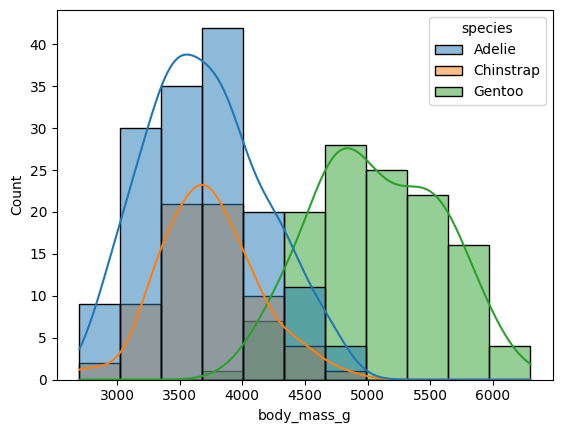

In [5]:
# 4. Visualiza la distribución de la masa corporal (body_mass_g) diferenciando entre especies usando un gráfico adecuado.
sns.histplot(data=penguins, x='body_mass_g', hue='species', kde=True)
plt.show()

### Ejercicio 2: Distribuciones de Probabilidad


### Instrucciones:
- 1. Ajusta una distribución normal a la variable body_mass_g para cada especie.
- 2. Realiza un test de normalidad (como Shapiro-Wilk) para verificar si los datos siguen una distribución normal.
 - 3. Grafica la distribución de los datos junto con la curva de la distribución normal ajustada.


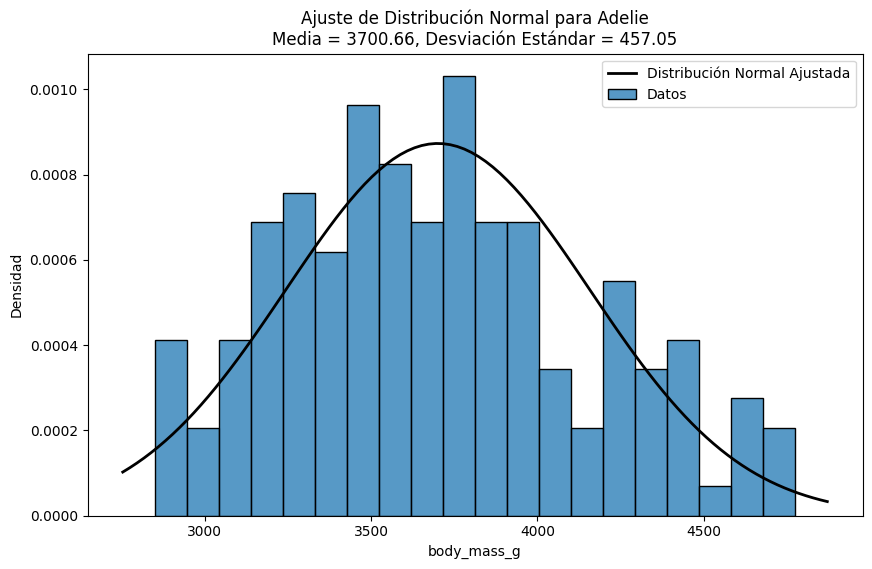

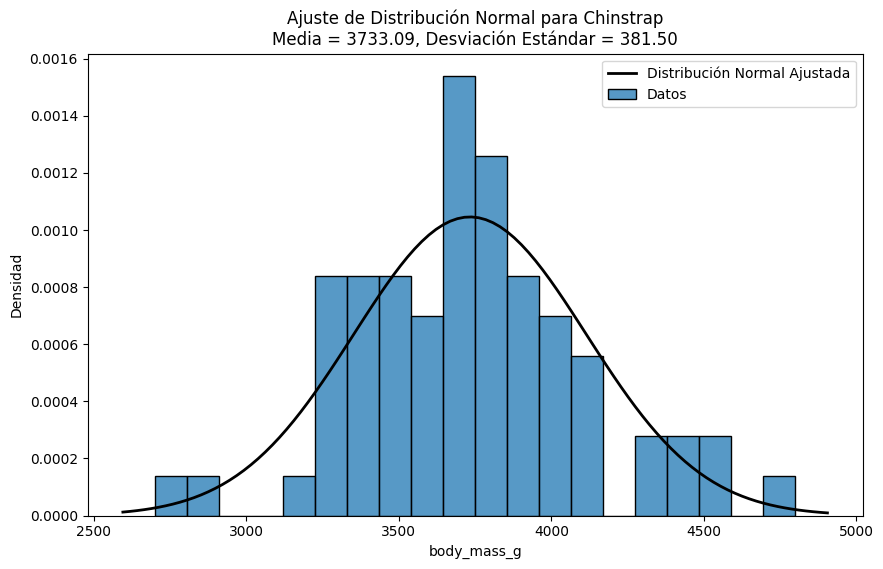

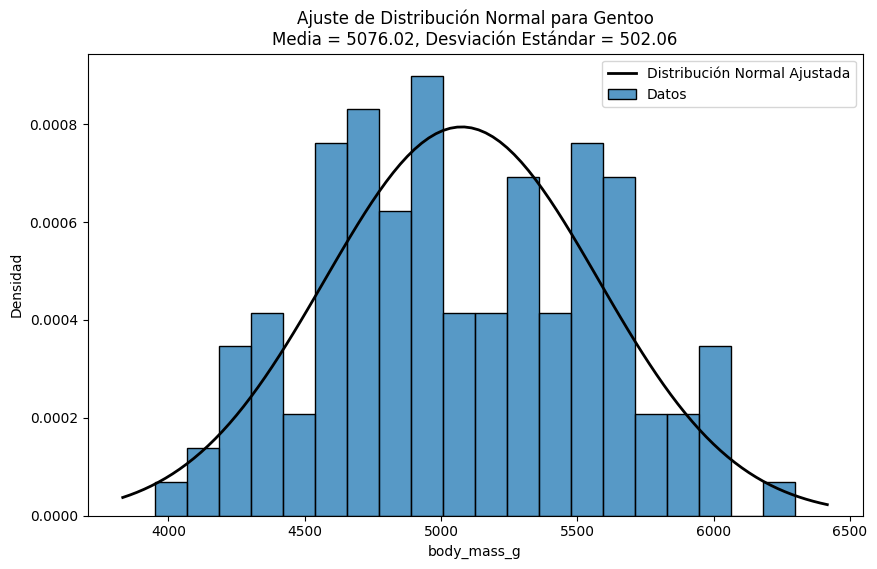

In [8]:
# 1. Ajusta una distribución normal a la variable body_mass_g para cada especie.
from scipy.stats import norm

# Ajustar una distribución normal a la variable body_mass_g para cada especie
species_list = penguins['species'].unique()

for species in species_list:
    subset = penguins[penguins['species'] == species]
    body_mass_g = subset['body_mass_g'].dropna()
    
    # Ajustar la distribución normal
    mu, std = norm.fit(body_mass_g)
    
    # Graficar el histograma y la distribución ajustada
    plt.figure(figsize=(10, 6))
    sns.histplot(body_mass_g, bins=20, kde=False, stat='density', label='Datos')
    
    # Graficar la distribución normal ajustada
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal Ajustada')
    
    title = f'Ajuste de Distribución Normal para {species}\nMedia = {mu:.2f}, Desviación Estándar = {std:.2f}'
    plt.title(title)
    plt.xlabel('body_mass_g')
    plt.ylabel('Densidad')
    plt.legend()
    
    plt.show()




In [11]:
# 2. Realiza un test de normalidad (como Shapiro-Wilk) para verificar si los datos siguen una distribución normal.
from scipy import stats
from scipy.stats import shapiro

# Realizar un test de normalidad (Shapiro-Wilk) para verificar si los datos siguen una distribución normal
species_list = penguins['species'].unique()

for species in species_list:
    subset = penguins[penguins['species'] == species]
    body_mass_g = subset['body_mass_g'].dropna()
    
    # Realizar el test de Shapiro-Wilk
    stat, p_value = shapiro(body_mass_g)
    
    # Imprimir los resultados del test
    print(f'Resultados del test de Shapiro-Wilk para {species}:')
    print(f'Estadístico: {stat:.4f}, p-valor: {p_value:.4f}')

# Interpretar el p-valor
    alpha = 0.05
    if p_value > alpha:
        print(f'No se puede rechazar la hipótesis nula: los datos siguen una distribución normal (p > {alpha})\n')
    else:
        print(f'Se rechaza la hipótesis nula: los datos no siguen una distribución normal (p <= {alpha})\n')


Resultados del test de Shapiro-Wilk para Adelie:
Estadístico: 0.9807, p-valor: 0.0324
Se rechaza la hipótesis nula: los datos no siguen una distribución normal (p <= 0.05)

Resultados del test de Shapiro-Wilk para Chinstrap:
Estadístico: 0.9845, p-valor: 0.5605
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal (p > 0.05)

Resultados del test de Shapiro-Wilk para Gentoo:
Estadístico: 0.9859, p-valor: 0.2336
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal (p > 0.05)



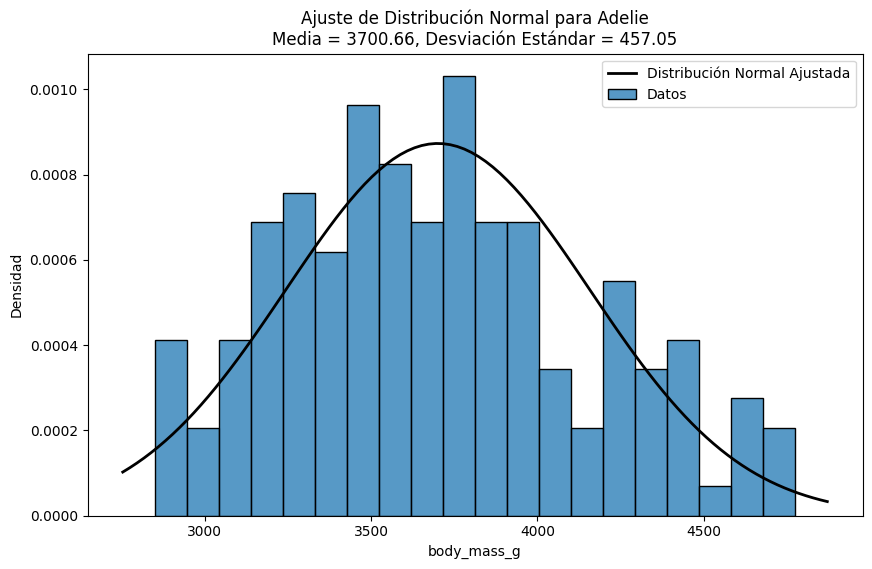

Resultados del test de Shapiro-Wilk para Adelie:
Estadístico: 0.9807, p-valor: 0.0324
Se rechaza la hipótesis nula: los datos no siguen una distribución normal (p <= 0.05)



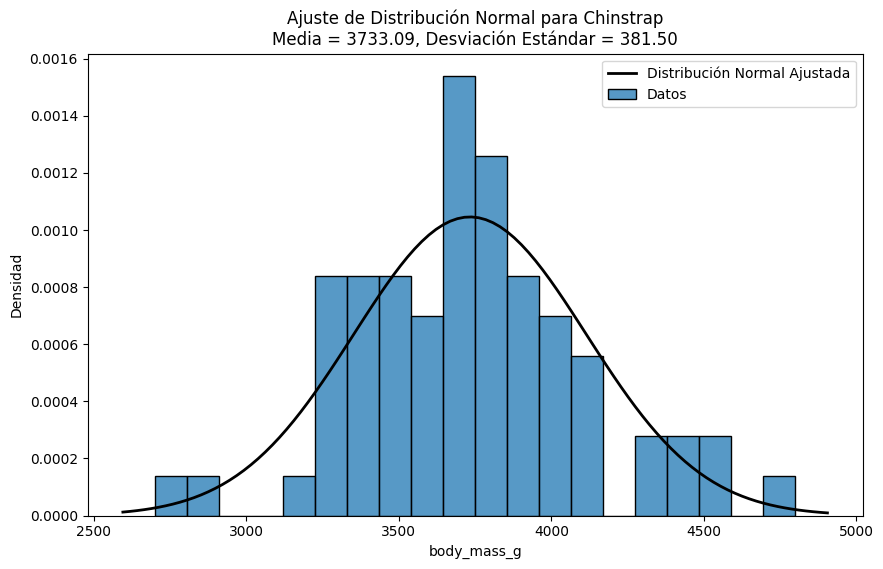

Resultados del test de Shapiro-Wilk para Chinstrap:
Estadístico: 0.9845, p-valor: 0.5605
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal (p > 0.05)



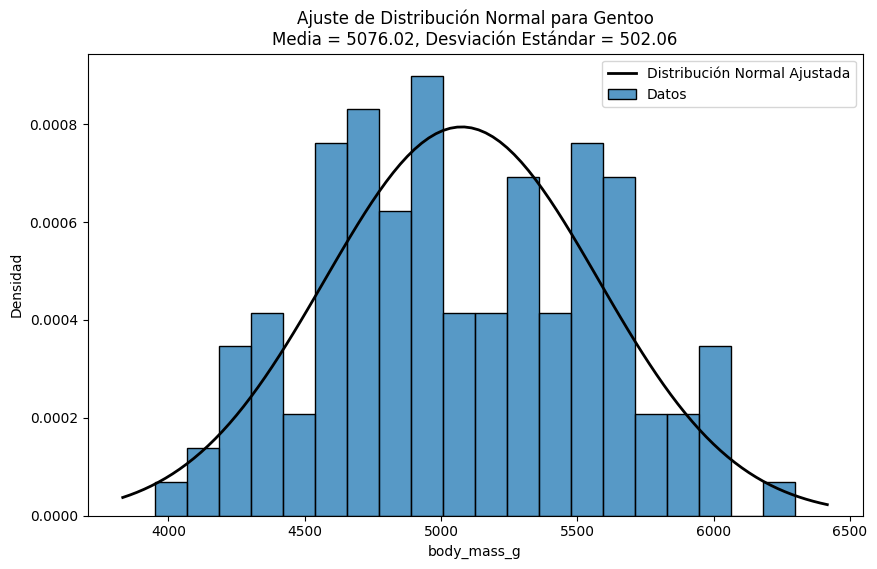

Resultados del test de Shapiro-Wilk para Gentoo:
Estadístico: 0.9859, p-valor: 0.2336
No se puede rechazar la hipótesis nula: los datos siguen una distribución normal (p > 0.05)



In [13]:
# 3. Grafica la distribución de los datos junto con la curva de la distribución normal ajustada.
# Realizar un test de normalidad (Shapiro-Wilk) y ajustar una distribución normal
species_list = penguins['species'].unique()

for species in species_list:
    subset = penguins[penguins['species'] == species]
    body_mass_g = subset['body_mass_g'].dropna()
    
    # Realizar el test de Shapiro-Wilk
    stat, p_value = shapiro(body_mass_g)
    
    # Ajustar la distribución normal
    mu, std = norm.fit(body_mass_g)
    
    # Graficar el histograma y la distribución ajustada
    plt.figure(figsize=(10, 6))
    sns.histplot(body_mass_g, bins=20, kde=False, stat='density', label='Datos')
    
    # Graficar la distribución normal ajustada
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal Ajustada')
    
    title = f'Ajuste de Distribución Normal para {species}\nMedia = {mu:.2f}, Desviación Estándar = {std:.2f}'
    plt.title(title)
    plt.xlabel('body_mass_g')
    plt.ylabel('Densidad')
    plt.legend()
    
    plt.show()
    
    # Imprimir los resultados del test
    print(f'Resultados del test de Shapiro-Wilk para {species}:')
    print(f'Estadístico: {stat:.4f}, p-valor: {p_value:.4f}')
    
    # Interpretar el p-valor
    alpha = 0.05
    if p_value > alpha:
        print(f'No se puede rechazar la hipótesis nula: los datos siguen una distribución normal (p > {alpha})\n')
    else:
        print(f'Se rechaza la hipótesis nula: los datos no siguen una distribución normal (p <= {alpha})\n')




### Ejercicio 3: Clustering con K-Means

### Instrucciones:
- 1. Selecciona las variables bill_length_mm y bill_depth_mm para realizar el clustering.
- 2. Aplica el algoritmo K-Means con 3 clusters.
- 3. Agrega la información de los clusters al DataFrame.
- 4. Visualiza los clusters obtenidos usando un gráfico de dispersión e identifica los centroides.


In [19]:
# 1. Selecciona las variables bill_length_mm y bill_depth_mm para realizar el clustering.
data = penguins[['bill_length_mm', 'bill_depth_mm']]
print(data.head())



   bill_length_mm  bill_depth_mm
0            39.1           18.7
1            39.5           17.4
2            40.3           18.0
3             NaN            NaN
4            36.7           19.3


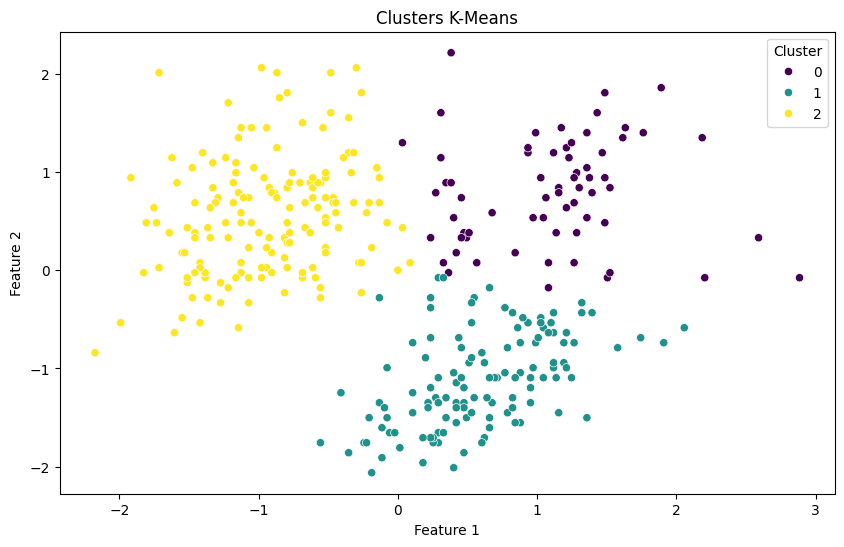

In [22]:
# 2. Aplica el algoritmo K-Means con 3 clusters.
from sklearn.cluster import KMeans

# Seleccionar las características para el clustering
features = ['bill_length_mm', 'bill_depth_mm']  # Reemplaza con los nombres de las columnas que deseas usar

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(penguins[features])

# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajustar el modelo a los datos
kmeans.fit(scaled_features)

# Obtener los clusters asignados a cada punto de datos
penguins['cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=penguins['cluster'], palette='viridis')
plt.title('Clusters K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()



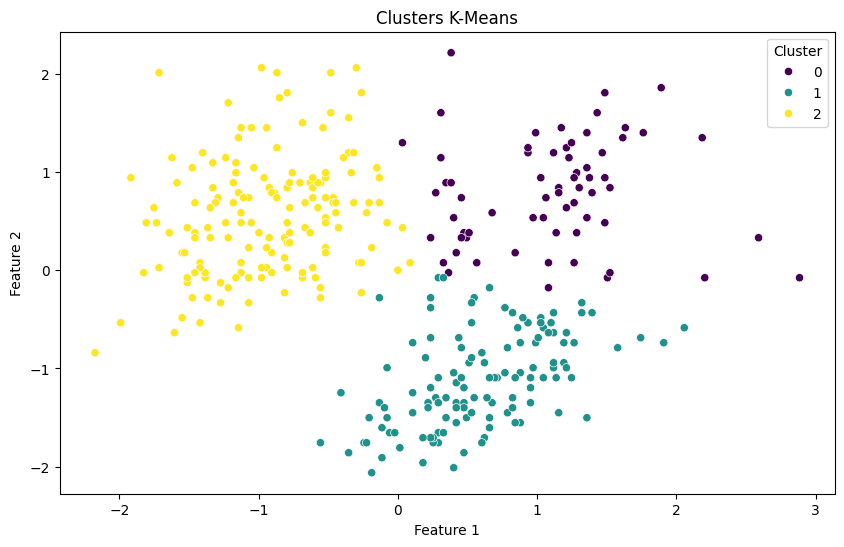

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  cluster  
0       3750.0    Male        2  
1       3800.0  Female        2  
2       3250.0  Female        2  
3          NaN     NaN        2  
4       3450.0  Female        2  


In [23]:
# 3. Agrega la información de los clusters al DataFrame.

# Seleccionar las características para el clustering
features = ['bill_length_mm', 'bill_depth_mm']  # Reemplaza con los nombres de las columnas que deseas usar

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(penguins[features])

# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajustar el modelo a los datos
kmeans.fit(scaled_features)

# Obtener los clusters asignados a cada punto de datos
penguins['cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=penguins['cluster'], palette='viridis')
plt.title('Clusters K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

# Mostrar el DataFrame con la nueva columna de clusters
print(penguins.head())



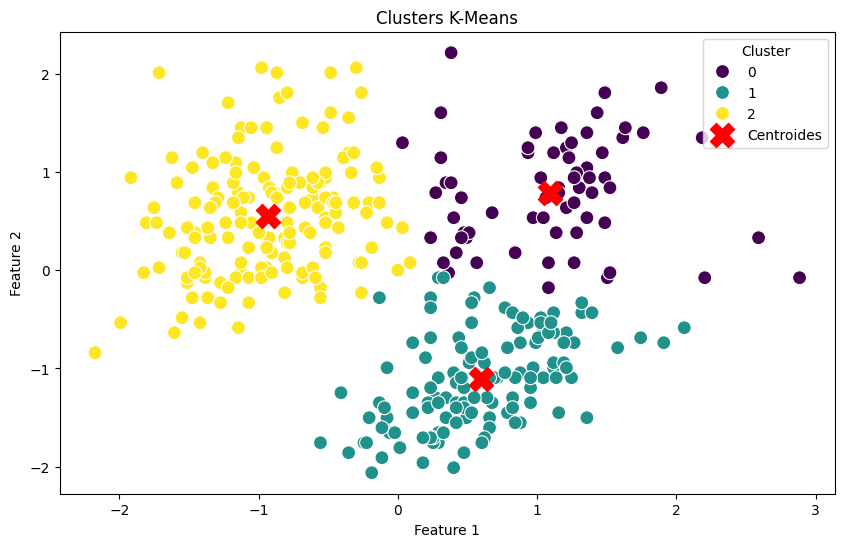

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  cluster  
0       3750.0    Male        2  
1       3800.0  Female        2  
2       3250.0  Female        2  
3          NaN     NaN        2  
4       3450.0  Female        2  


In [24]:
# 4. Visualiza los clusters obtenidos usando un gráfico de dispersión e identifica los centroides.

# Seleccionar las características para el clustering
features = ['bill_length_mm', 'bill_depth_mm']  # Reemplaza con los nombres de las columnas que deseas usar

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(penguins[features])

# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajustar el modelo a los datos
kmeans.fit(scaled_features)

# Obtener los clusters asignados a cada punto de datos
penguins['cluster'] = kmeans.labels_

# Obtener los centroides
centroids = kmeans.cluster_centers_

# Visualizar los clusters y los centroides
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=penguins['cluster'], palette='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroides', marker='X')
plt.title('Clusters K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

# Mostrar el DataFrame con la nueva columna de clusters
print(penguins.head())

### Ejercicio 4: Reducción de Dimensionalidad con PCA
- Instrucciones:
    - 1. Selecciona las variables numéricas del dataset y elimina las no numéricas.
    - 2. Aplica PCA para reducir la dimensionalidad a 2 componentes principales.
    - 3. Transforma los datos usando PCA y crea un nuevo DataFrame con las componentes principales.
    - 4. Grafica los datos transformados, coloreando por especie

In [27]:
# 1. Selecciona las variables numéricas del dataset y elimina las no numéricas.

# Seleccionar solo las columnas numéricas
numerical_features = penguins.select_dtypes(include=['float64', 'int64'])

# Mostrar las primeras filas del DataFrame con solo las columnas numéricas
print(numerical_features.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
3             NaN            NaN                NaN          NaN
4            36.7           19.3              193.0       3450.0


In [30]:
from sklearn.decomposition import PCA

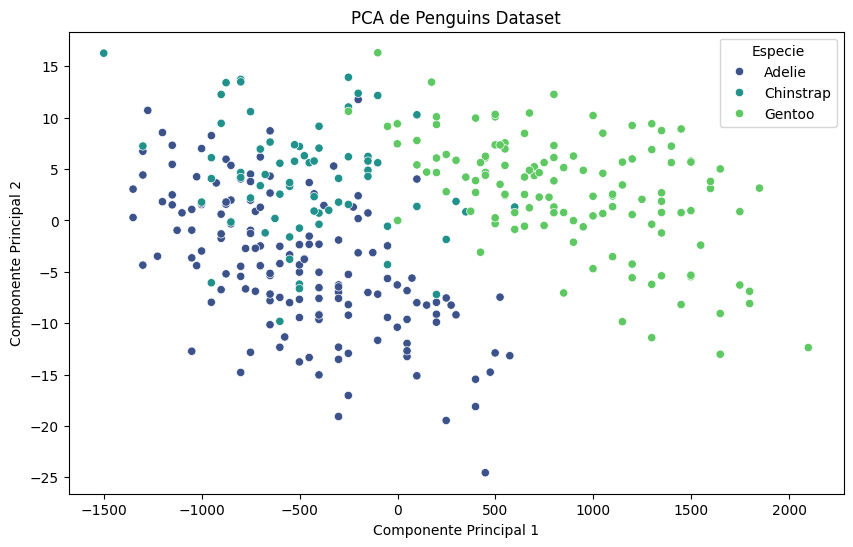

In [32]:
# 2. Aplica PCA para reducir la dimensionalidad a 2 componentes principales.

# Seleccionar solo las columnas numéricas
numerical_features = penguins.select_dtypes(include=['float64', 'int64'])

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(numerical_features)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(imputed_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la columna 'species' para colorear por especie
pca_df['species'] = penguins['species'].values

# Graficar los datos transformados, coloreando por especie
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis')
plt.title('PCA de Penguins Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Especie')
plt.show()

          PC1        PC2 species
0 -452.023209 -13.336636  Adelie
1 -401.949980  -9.152694  Adelie
2 -951.740904   8.261476  Adelie
3    0.000000   0.000000  Adelie
4 -751.812661   1.975922  Adelie


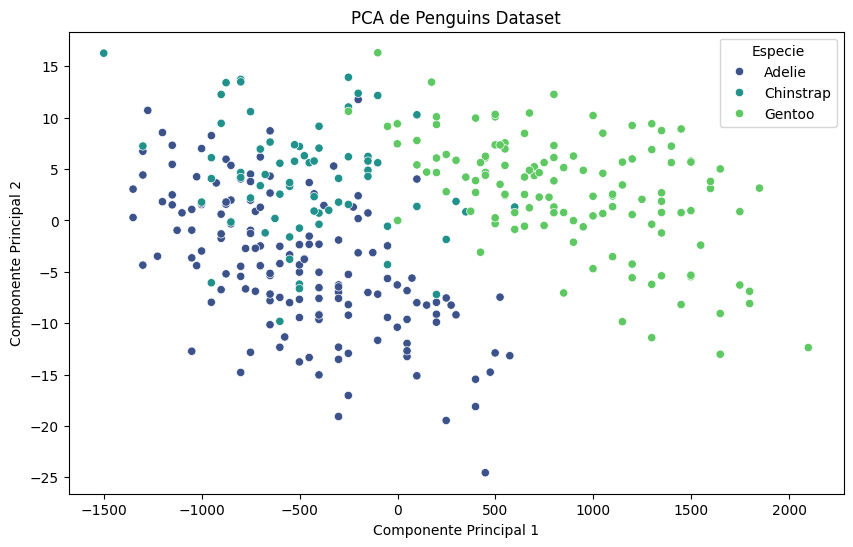

In [33]:
# 3. Transforma los datos usando PCA y crea un nuevo DataFrame con las componentes principales.

# Seleccionar solo las columnas numéricas
numerical_features = penguins.select_dtypes(include=['float64', 'int64'])

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(numerical_features)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(imputed_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la columna 'species' para colorear por especie
pca_df['species'] = penguins['species'].values

# Mostrar el nuevo DataFrame con las componentes principales
print(pca_df.head())

# Graficar los datos transformados, coloreando por especie
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis')
plt.title('PCA de Penguins Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Especie')
plt.show()

          PC1        PC2 species
0 -452.023209 -13.336636  Adelie
1 -401.949980  -9.152694  Adelie
2 -951.740904   8.261476  Adelie
3    0.000000   0.000000  Adelie
4 -751.812661   1.975922  Adelie


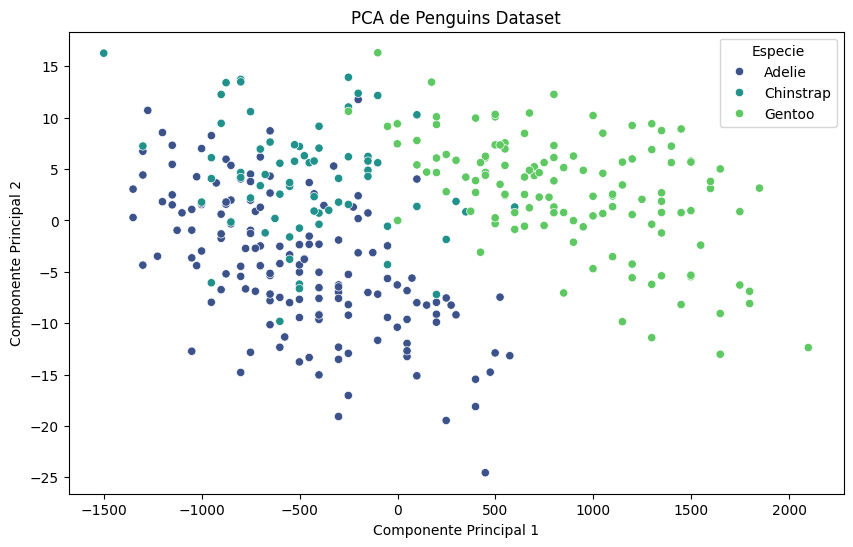

In [34]:
# 4. Grafica los datos transformados, coloreando por especie

# Seleccionar solo las columnas numéricas
numerical_features = penguins.select_dtypes(include=['float64', 'int64'])

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(numerical_features)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(imputed_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la columna 'species' para colorear por especie
pca_df['species'] = penguins['species'].values

# Mostrar el nuevo DataFrame con las componentes principales
print(pca_df.head())

# Graficar los datos transformados, coloreando por especie
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis')
plt.title('PCA de Penguins Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Especie')
plt.show()